<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#imports" data-toc-modified-id="imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>imports</a></span></li><li><span><a href="#load-data" data-toc-modified-id="load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>load data</a></span><ul class="toc-item"><li><span><a href="#read-in-the-files" data-toc-modified-id="read-in-the-files-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>read in the files</a></span></li><li><span><a href="#create-pandas-table" data-toc-modified-id="create-pandas-table-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>create pandas table</a></span></li></ul></li><li><span><a href="#determine-the-best-lambda-parameter-for-each-(r,n,L)." data-toc-modified-id="determine-the-best-lambda-parameter-for-each-(r,n,L).-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>determine the best lambda parameter for each (r,n,L).</a></span></li><li><span><a href="#Generalization-MSE" data-toc-modified-id="Generalization-MSE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generalization MSE</a></span><ul class="toc-item"><li><span><a href="#generate-data" data-toc-modified-id="generate-data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>generate data</a></span></li><li><span><a href="#compute-MSE" data-toc-modified-id="compute-MSE-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>compute MSE</a></span></li></ul></li><li><span><a href="#Out-of-Distribution-MSE" data-toc-modified-id="Out-of-Distribution-MSE-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Out of Distribution MSE</a></span><ul class="toc-item"><li><span><a href="#generate-data" data-toc-modified-id="generate-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>generate data</a></span></li><li><span><a href="#compute-MSE" data-toc-modified-id="compute-MSE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>compute MSE</a></span></li></ul></li><li><span><a href="#Active-Subspace" data-toc-modified-id="Active-Subspace-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Active Subspace</a></span><ul class="toc-item"><li><span><a href="#evaluate-gradients-and-compute-singular-values-and-active-subspaces" data-toc-modified-id="evaluate-gradients-and-compute-singular-values-and-active-subspaces-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>evaluate gradients and compute singular values and active subspaces</a></span></li><li><span><a href="#plot-of-singular-values" data-toc-modified-id="plot-of-singular-values-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>plot of singular values</a></span></li></ul></li><li><span><a href="#Final-Table" data-toc-modified-id="Final-Table-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final Table</a></span></li><li><span><a href="#Training-Time-Plots" data-toc-modified-id="Training-Time-Plots-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training Time Plots</a></span><ul class="toc-item"><li><span><a href="#Train-MSE-v-Epoch" data-toc-modified-id="Train-MSE-v-Epoch-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Train MSE v Epoch</a></span></li><li><span><a href="#Weight-Decay-v-Epoch" data-toc-modified-id="Weight-Decay-v-Epoch-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Weight Decay v Epoch</a></span></li><li><span><a href="#learning-rates" data-toc-modified-id="learning-rates-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>learning rates</a></span></li></ul></li></ul></div>

# imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.stats import ortho_group
from scipy.stats import linregress
from scipy import linalg as la
from torch import nn
import torch
from tqdm import tqdm

# load data

data is saved in this folder: https://drive.google.com/drive/folders/1JOg943Q-qD8xzwRlPwF-ruzzT-VRlptF?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd drive/MyDrive/TeacherNetworkResults/

/content/drive/.shortcut-targets-by-id/1JOg943Q-qD8xzwRlPwF-ruzzT-VRlptF/TeacherNetworkResults


In [4]:
ls

learningrate_r1_N64.npy    model_r2_N128_L4_wd1e-05   testmse_r2_N128.npy
learningrate_r2_N128.npy   model_r2_N256_L2_wd0.0001  testmse_r2_N256.npy
learningrate_r2_N256.npy   model_r2_N256_L2_wd0.001   testmse_r2_N64.npy
learningrate_r2_N64.npy    model_r2_N256_L2_wd1e-05   trainmse.png
model_r1_N64_L2_wd0.0001   model_r2_N256_L4_wd0.0001  trainmse_r1_N64.npy
model_r1_N64_L2_wd0.001    model_r2_N256_L4_wd0.001   trainmse_r2_N128.npy
model_r1_N64_L2_wd1e-05    model_r2_N256_L4_wd1e-05   trainmse_r2_N256.npy
model_r1_N64_L4_wd0.0001   model_r2_N64_L2_wd0.0001   trainmse_r2_N64.npy
model_r1_N64_L4_wd0.001    model_r2_N64_L2_wd0.001    weightdecay.png
model_r1_N64_L4_wd1e-05    model_r2_N64_L2_wd1e-05    weightdecay_r1_N64.npy
model_r2_N128_L2_wd0.0001  model_r2_N64_L4_wd0.0001   weightdecay_r2_N128.npy
model_r2_N128_L2_wd0.001   model_r2_N64_L4_wd0.001    weightdecay_r2_N256.npy
model_r2_N128_L2_wd1e-05   model_r2_N64_L4_wd1e-05    weightdecay_r2_N64.npy
model_r2_N128_L4_wd0.0001  sv.png


## read in the files

In [5]:
rnvals = [(1,64),(2,64),(2,128),(2,256)]
Ls = [2,4]
wds = [1e-3,1e-4,1e-5]

In [6]:
testMSEs = {}
trainMSEs = {}
weightdecays = {}
learningrates = {}
for r,n in rnvals:
  testMSEs[r,n] = np.load(f"testmse_r{r}_N{n}.npy",allow_pickle=True).item()
  trainMSEs[r,n] = np.load(f"trainmse_r{r}_N{n}.npy",allow_pickle=True).item()
  weightdecays[r,n] = np.load(f"weightdecay_r{r}_N{n}.npy",allow_pickle=True).item()
  learningrates[r,n] = np.load(f"learningrate_r{r}_N{n}.npy",allow_pickle=True).item()

In [7]:
def Llayers(L,d=20,width=1000):
    #construct L-1 linear layers; bias term only on last linear layer
    if L < 2:
        raise ValueError("L must be at least 2")
    if L == 2:
        linear_layers = [nn.Linear(d,width,bias=True)]
    if L > 2:
        linear_layers = [nn.Linear(d,width,bias=False)]
        for l in range(L-3):
            linear_layers.append(nn.Linear(width,width,bias=False))
        linear_layers.append(nn.Linear(width,width,bias=True))

    relu = nn.ReLU()

    last_layer = nn.Linear(width,1)

    layers = linear_layers + [relu,last_layer]

    return nn.Sequential(*layers)

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [9]:
models = {}
for r,n in rnvals:
  for L in Ls:
    for wd in wds:
      print(r,n,L,wd)
      models[r,n,L,wd] = Llayers(L).to(device)
      models[r,n,L,wd].load_state_dict(torch.load(f"model_r{r}_N{n}_L{L}_wd{wd}"))
      models[r,n,L,wd].eval()

1 64 2 0.001
1 64 2 0.0001
1 64 2 1e-05
1 64 4 0.001
1 64 4 0.0001
1 64 4 1e-05
2 64 2 0.001
2 64 2 0.0001
2 64 2 1e-05
2 64 4 0.001
2 64 4 0.0001
2 64 4 1e-05
2 128 2 0.001
2 128 2 0.0001
2 128 2 1e-05
2 128 4 0.001
2 128 4 0.0001
2 128 4 1e-05
2 256 2 0.001
2 256 2 0.0001
2 256 2 1e-05
2 256 4 0.001
2 256 4 0.0001
2 256 4 1e-05


## create pandas table

In [10]:
res = {
  "r"                 : [r                         for wd in wds for L in Ls for r,n in rnvals],
  "n"                 : [n                         for wd in wds for L in Ls for r,n in rnvals],
  "L"                 : [L                         for wd in wds for L in Ls for r,n in rnvals],
  "lambda"            : [wd                        for wd in wds for L in Ls for r,n in rnvals],
  "Learning Rate"     : [learningrates[r,n][L][wd] for wd in wds for L in Ls for r,n in rnvals],
  "Train MSE"         : [trainMSEs[r,n][L][wd]     for wd in wds for L in Ls for r,n in rnvals],
  "Weight Decay"      : [weightdecays[r,n][L][wd]  for wd in wds for L in Ls for r,n in rnvals],
  "Model"             : [models[r,n,L,wd]          for wd in wds for L in Ls for r,n in rnvals],
  "Test MSE"          : [testMSEs[r,n][L][wd].item()      for wd in wds for L in Ls for r,n in rnvals],
}
res = pd.DataFrame(res)
res["Final Train MSE"] = [r[-1] for r in res["Train MSE"]]
res["Final Weight Decay"] = [r[-1] for r in res["Weight Decay"]]
res

,r,n,L,lambda,Learning Rate,Train MSE,Weight Decay,Model,Test MSE,Final Train MSE,Final Weight Decay
0,1,64,2,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.94083, 46.85972, 46.77882, 46.698128, 46.6...","[1340.811, 1340.6844, 1340.561, 1340.4401, 134...","[Linear(in_features=20, out_features=1000, bia...",0.130939,3.383872e-06,228.918182
1,2,64,2,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[86.339066, 86.16455, 85.990234, 85.81613, 85....","[1340.9512, 1340.9651, 1340.9836, 1341.0074, 1...","[Linear(in_features=20, out_features=1000, bia...",10.482715,2.694048e-07,328.510651
2,2,128,2,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[94.88629, 94.539246, 94.19335, 93.84813, 93.5...","[1340.9926, 1341.0493, 1341.1245, 1341.2202, 1...","[Linear(in_features=20, out_features=1000, bia...",5.685436,7.783952e-05,548.726990
3,2,256,2,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[99.51898, 98.82509, 98.134186, 97.4485, 96.76...","[1341.054, 1341.229, 1341.4966, 1341.8643, 134...","[Linear(in_features=20, out_features=1000, bia...",4.056290,4.355371e-04,844.893066
4,1,64,4,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.59013, 46.100685, 45.620773, 45.14263, 44....","[6009.557, 6009.319, 6009.3955, 6009.777, 6010...","[Linear(in_features=20, out_features=1000, bia...",0.000916,8.188788e-05,149.961258
5,2,64,4,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[85.56869, 84.967, 84.3752, 83.792206, 83.2157...","[6009.759, 6009.8027, 6010.224, 6011.016, 6012...","[Linear(in_features=20, out_features=1000, bia...",12.658886,4.945031e-07,320.151154
6,2,128,4,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[93.838806, 92.921585, 92.0141, 91.11563, 90.2...","[6009.638, 6010.151, 6011.7637, 6014.358, 6017...","[Linear(in_features=20, out_features=1000, bia...",7.891725,1.742696e-05,565.157410
7,2,256,4,0.00100,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[98.07577, 96.37631, 94.672516, 92.87831, 90.9...","[6009.9746, 6013.515, 6020.724, 6031.376, 6045...","[Linear(in_features=20, out_features=1000, bia...",0.027026,9.971629e-04,513.987793
8,1,64,2,0.00010,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.94083, 46.859703, 46.7788, 46.698097, 46.6...","[1340.8812, 1340.8269, 1340.7769, 1340.7301, 1...","[Linear(in_features=20, out_features=1000, bia...",0.326103,3.986837e-10,233.464264
9,2,64,2,0.00010,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[86.339066, 86.16455, 85.99022, 85.81612, 85.6...","[1340.9998, 1341.0647, 1341.1343, 1341.2096, 1...","[Linear(in_features=20, out_features=1000, bia...",10.921717,1.620148e-11,346.037781


#  determine the best lambda parameter for each (r,n,L). 

Turns out to alwyas be $\lambda = 1e-3$, so drop the rest of the rows

In [11]:
res.pivot_table(index = ("r","n","L"), columns = ['lambda'],values=["Test MSE"])

Test MSE                      
lambda     0.00001    0.00010    0.00100
r n   L                                 
1 64  2   1.453491   0.326103   0.130939
      4   0.064265   0.045876   0.000916
2 64  2  12.173356  10.921717  10.482715
      4  22.600082  18.556763  12.658886
  128 2   6.561179   5.778584   5.685436
      4  10.681711   9.417183   7.891725
  256 2   4.805980   4.153081   4.056290
      4   3.908140   2.461235   0.027026

In [12]:
res = res[res["lambda"] == 1e-3]

In [13]:
res

,r,n,L,lambda,Learning Rate,Train MSE,Weight Decay,Model,Test MSE,Final Train MSE,Final Weight Decay
0,1,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.94083, 46.85972, 46.77882, 46.698128, 46.6...","[1340.811, 1340.6844, 1340.561, 1340.4401, 134...","[Linear(in_features=20, out_features=1000, bia...",0.130939,3.383872e-06,228.918182
1,2,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[86.339066, 86.16455, 85.990234, 85.81613, 85....","[1340.9512, 1340.9651, 1340.9836, 1341.0074, 1...","[Linear(in_features=20, out_features=1000, bia...",10.482715,2.694048e-07,328.510651
2,2,128,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[94.88629, 94.539246, 94.19335, 93.84813, 93.5...","[1340.9926, 1341.0493, 1341.1245, 1341.2202, 1...","[Linear(in_features=20, out_features=1000, bia...",5.685436,7.783952e-05,548.726990
3,2,256,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[99.51898, 98.82509, 98.134186, 97.4485, 96.76...","[1341.054, 1341.229, 1341.4966, 1341.8643, 134...","[Linear(in_features=20, out_features=1000, bia...",4.056290,4.355371e-04,844.893066
4,1,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.59013, 46.100685, 45.620773, 45.14263, 44....","[6009.557, 6009.319, 6009.3955, 6009.777, 6010...","[Linear(in_features=20, out_features=1000, bia...",0.000916,8.188788e-05,149.961258
5,2,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[85.56869, 84.967, 84.3752, 83.792206, 83.2157...","[6009.759, 6009.8027, 6010.224, 6011.016, 6012...","[Linear(in_features=20, out_features=1000, bia...",12.658886,4.945031e-07,320.151154
6,2,128,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[93.838806, 92.921585, 92.0141, 91.11563, 90.2...","[6009.638, 6010.151, 6011.7637, 6014.358, 6017...","[Linear(in_features=20, out_features=1000, bia...",7.891725,1.742696e-05,565.157410
7,2,256,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[98.07577, 96.37631, 94.672516, 92.87831, 90.9...","[6009.9746, 6013.515, 6020.724, 6031.376, 6045...","[Linear(in_features=20, out_features=1000, bia...",0.027026,9.971629e-04,513.987793


# Generalization MSE

## generate data

In [14]:
def gen_data(datasetsize,r,seed,trainsize=2**18,testsize=2**10,d=20,funcseed=42,verbose=False,ood=False):
    ##Generate data with a true central subspaces of varying dimensions
    #generate X values for training and test sets
    np.random.seed(seed) #set seed for data generation 
    trainX = np.random.rand(d,trainsize).astype(np.float32)[:,:datasetsize] - 0.5 #distributed as U[-1/2, 1/2]
    testX = np.random.rand(d,testsize).astype(np.float32) - 0.5 #distributed as U[-1/2, 1/2]
    #out of distribution datagen
    if ood:
      trainX *= 2 #now distributed as U[-1, 1]
      testX *= 2 #now distributed as U[-1, 1]
    ##for each $r$ value create and store data-gen functions and $y$ evaluations
    #geneate params for functions
    k = d+1
    np.random.seed(funcseed) #set seed for random function generation
    U = ortho_group.rvs(k)[:,:r]
    Sigma = np.random.rand(r)*100
    V = ortho_group.rvs(d)[:,:r]
    W = (U * Sigma) @ V.T
    A = np.random.randn(k)
    B = np.random.randn(k)
    #create functions
    def g(z): #active subspace function
        hidden_layer = (U*Sigma)@z
        hidden_layer = hidden_layer.T + B
        hidden_layer = np.maximum(0,hidden_layer).T
        return A@hidden_layer
    def f(x): #teacher network
        z = V.T@x
        return g(z)
    #generate data
    trainY = f(trainX).astype(np.float32)
    testY = f(testX).astype(np.float32)
    #move data to device
    if verbose: 
        print("device: {}".format(device))
    trainX = torch.from_numpy(trainX).T.to(device)
    trainY = torch.from_numpy(trainY).to(device)
    testX = torch.from_numpy(testX).T.to(device)
    testY = torch.from_numpy(testY).to(device)
    if verbose: 
        print("trainX shape = {} trainY shape = {}".format(
            trainX.shape, 
            trainY.shape
        ))
    return trainX,trainY,testX,testY


In [15]:
generalizationX,generalizationYr1 = gen_data(2048,r=1,seed=101)[:2]
generalizationX,generalizationYr2 = gen_data(2048,r=2,seed=101)[:2]
generalizationY = {1:generalizationYr1,2:generalizationYr2}

In [16]:
generalizationX.min(),generalizationX.max()

(tensor(-0.4999), tensor(0.5000))

## compute MSE

In [17]:
with torch.no_grad():
  generalization = []
  for rownum, row in res.iterrows():
    predY = row["Model"](generalizationX)
    err = nn.functional.mse_loss(predY[:,0],generalizationY[row["r"]]).item()
    generalization.append(err)
  res["Generalization MSE"] = generalization

<ipython-input-17-44487cd27efe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Generalization MSE"] = generalization


In [18]:
res

,r,n,L,lambda,Learning Rate,Train MSE,Weight Decay,Model,Test MSE,Final Train MSE,Final Weight Decay,Generalization MSE
0,1,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.94083, 46.85972, 46.77882, 46.698128, 46.6...","[1340.811, 1340.6844, 1340.561, 1340.4401, 134...","[Linear(in_features=20, out_features=1000, bia...",0.130939,3.383872e-06,228.918182,0.123922
1,2,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[86.339066, 86.16455, 85.990234, 85.81613, 85....","[1340.9512, 1340.9651, 1340.9836, 1341.0074, 1...","[Linear(in_features=20, out_features=1000, bia...",10.482715,2.694048e-07,328.510651,10.363419
2,2,128,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[94.88629, 94.539246, 94.19335, 93.84813, 93.5...","[1340.9926, 1341.0493, 1341.1245, 1341.2202, 1...","[Linear(in_features=20, out_features=1000, bia...",5.685436,7.783952e-05,548.726990,5.970307
3,2,256,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[99.51898, 98.82509, 98.134186, 97.4485, 96.76...","[1341.054, 1341.229, 1341.4966, 1341.8643, 134...","[Linear(in_features=20, out_features=1000, bia...",4.056290,4.355371e-04,844.893066,4.050545
4,1,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.59013, 46.100685, 45.620773, 45.14263, 44....","[6009.557, 6009.319, 6009.3955, 6009.777, 6010...","[Linear(in_features=20, out_features=1000, bia...",0.000916,8.188788e-05,149.961258,0.000886
5,2,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[85.56869, 84.967, 84.3752, 83.792206, 83.2157...","[6009.759, 6009.8027, 6010.224, 6011.016, 6012...","[Linear(in_features=20, out_features=1000, bia...",12.658886,4.945031e-07,320.151154,12.528680
6,2,128,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[93.838806, 92.921585, 92.0141, 91.11563, 90.2...","[6009.638, 6010.151, 6011.7637, 6014.358, 6017...","[Linear(in_features=20, out_features=1000, bia...",7.891725,1.742696e-05,565.157410,8.041153
7,2,256,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[98.07577, 96.37631, 94.672516, 92.87831, 90.9...","[6009.9746, 6013.515, 6020.724, 6031.376, 6045...","[Linear(in_features=20, out_features=1000, bia...",0.027026,9.971629e-04,513.987793,0.023540


# Out of Distribution MSE

## generate data

In [19]:
oodX,oodYr1 = gen_data(2048,r=1,seed=101,ood=True)[:2] #generate out of distribution data
oodX,oodYr2 = gen_data(2048,r=2,seed=101,ood=True)[:2]
oodY = {1:oodYr1,2:oodYr2}

In [20]:
oodX.min(),oodX.max()

(tensor(-0.9999), tensor(1.0000))

## compute MSE

In [21]:
with torch.no_grad():
  ood_errs = []
  for rownum, row in res.iterrows():
    predY = row["Model"](oodX)
    err = nn.functional.mse_loss(predY[:,0],oodY[row["r"]]).item()
    ood_errs.append(err)
  res["Out of Distribution MSE"] = ood_errs

<ipython-input-21-8428f7dc06b7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Out of Distribution MSE"] = ood_errs


In [22]:
res

,r,n,L,lambda,Learning Rate,Train MSE,Weight Decay,Model,Test MSE,Final Train MSE,Final Weight Decay,Generalization MSE,Out of Distribution MSE
0,1,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.94083, 46.85972, 46.77882, 46.698128, 46.6...","[1340.811, 1340.6844, 1340.561, 1340.4401, 134...","[Linear(in_features=20, out_features=1000, bia...",0.130939,3.383872e-06,228.918182,0.123922,1.085970
1,2,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[86.339066, 86.16455, 85.990234, 85.81613, 85....","[1340.9512, 1340.9651, 1340.9836, 1341.0074, 1...","[Linear(in_features=20, out_features=1000, bia...",10.482715,2.694048e-07,328.510651,10.363419,42.304131
2,2,128,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[94.88629, 94.539246, 94.19335, 93.84813, 93.5...","[1340.9926, 1341.0493, 1341.1245, 1341.2202, 1...","[Linear(in_features=20, out_features=1000, bia...",5.685436,7.783952e-05,548.726990,5.970307,26.774363
3,2,256,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[99.51898, 98.82509, 98.134186, 97.4485, 96.76...","[1341.054, 1341.229, 1341.4966, 1341.8643, 134...","[Linear(in_features=20, out_features=1000, bia...",4.056290,4.355371e-04,844.893066,4.050545,18.744333
4,1,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.59013, 46.100685, 45.620773, 45.14263, 44....","[6009.557, 6009.319, 6009.3955, 6009.777, 6010...","[Linear(in_features=20, out_features=1000, bia...",0.000916,8.188788e-05,149.961258,0.000886,0.005394
5,2,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[85.56869, 84.967, 84.3752, 83.792206, 83.2157...","[6009.759, 6009.8027, 6010.224, 6011.016, 6012...","[Linear(in_features=20, out_features=1000, bia...",12.658886,4.945031e-07,320.151154,12.528680,50.188057
6,2,128,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[93.838806, 92.921585, 92.0141, 91.11563, 90.2...","[6009.638, 6010.151, 6011.7637, 6014.358, 6017...","[Linear(in_features=20, out_features=1000, bia...",7.891725,1.742696e-05,565.157410,8.041153,39.235748
7,2,256,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[98.07577, 96.37631, 94.672516, 92.87831, 90.9...","[6009.9746, 6013.515, 6020.724, 6031.376, 6045...","[Linear(in_features=20, out_features=1000, bia...",0.027026,9.971629e-04,513.987793,0.023540,0.238946


# Active Subspace

## evaluate gradients and compute singular values and active subspaces

In [23]:
generalizationY

{1: tensor([  2.8498,   1.3553,  -7.2570,  ...,   0.7691, -12.6291,   1.3051]),
 2: tensor([ 1.5574,  7.7949, 19.1428,  ...,  8.1604, 10.2077,  3.3550])}

In [24]:
grads = []
sv = []
active_subspace = []
subspace_dist = []

for rownum, row in res.iterrows():
  #compute ground truth active subspace
  funcseed = 42
  d = 20
  k = d+1
  np.random.seed(funcseed) #set seed for random function generation
  U = ortho_group.rvs(k)[:,:row["r"]]
  Sigma = np.random.rand(row["r"])*100
  V = ortho_group.rvs(d)[:,:row["r"]]

  #evaluate gradients
  generalizationX.requires_grad = True
  predY = row["Model"](generalizationX)
  grad = torch.autograd.grad(predY, generalizationX, 
                            grad_outputs=torch.ones_like(predY), 
                            create_graph=True)[0].detach().cpu().numpy()
  grads.append(grad)
  #compute active subspace and singular values
  Uhat,Shat,VhatT = np.linalg.svd(grad)
  Vhat = VhatT.T[:,:row["r"]] #form the basis for the active subspace
  active_subspace.append(Vhat)
  sv.append(Shat)

  subspace_dist.append(np.linalg.norm(V@V.T - Vhat@Vhat.T,2))

res["Gradient Evaluations"] = grads
res["Gradient Singular Values"] = sv
res["Active Subspace"] = active_subspace
res["Active Subspace Distance"] = subspace_dist

res

<ipython-input-24-55e9fd305abf>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Gradient Evaluations"] = grads
<ipython-input-24-55e9fd305abf>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res["Gradient Singular Values"] = sv
<ipython-input-24-55e9fd305abf>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,r,n,L,lambda,Learning Rate,Train MSE,Weight Decay,Model,Test MSE,Final Train MSE,Final Weight Decay,Generalization MSE,Out of Distribution MSE,Gradient Evaluations,Gradient Singular Values,Active Subspace,Active Subspace Distance
0,1,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.94083, 46.85972, 46.77882, 46.698128, 46.6...","[1340.811, 1340.6844, 1340.561, 1340.4401, 134...","[Linear(in_features=20, out_features=1000, bia...",0.130939,3.383872e-06,228.918182,0.123922,1.085970,"[[0.10911514, 0.110699266, -5.7298026, -1.6110...","[891.2251, 19.230478, 13.442683, 11.468971, 8....","[[-0.0029612263], [0.019997219], [-0.58910656]...",0.039473
1,2,64,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[86.339066, 86.16455, 85.990234, 85.81613, 85....","[1340.9512, 1340.9651, 1340.9836, 1341.0074, 1...","[Linear(in_features=20, out_features=1000, bia...",10.482715,2.694048e-07,328.510651,10.363419,42.304131,"[[1.4673525, 0.20645843, 0.7674924, -1.8290737...","[394.4689, 213.78072, 119.14437, 80.67951, 76....","[[-0.25160542, 0.42816514], [0.03778402, -0.20...",0.758820
2,2,128,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[94.88629, 94.539246, 94.19335, 93.84813, 93.5...","[1340.9926, 1341.0493, 1341.1245, 1341.2202, 1...","[Linear(in_features=20, out_features=1000, bia...",5.685436,7.783952e-05,548.726990,5.970307,26.774363,"[[2.6723716, -0.9334078, 3.1968865, 0.55468285...","[516.7623, 300.5516, 133.15321, 100.09998, 91....","[[-0.22545569, -0.2876952], [-0.012613738, 0.1...",0.497017
3,2,256,2,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[99.51898, 98.82509, 98.134186, 97.4485, 96.76...","[1341.054, 1341.229, 1341.4966, 1341.8643, 134...","[Linear(in_features=20, out_features=1000, bia...",4.056290,4.355371e-04,844.893066,4.050545,18.744333,"[[3.0792017, 0.24106434, 1.897212, 1.1413016, ...","[639.3272, 337.75433, 140.80553, 114.53874, 95...","[[-0.2119569, -0.25212276], [0.03636463, 0.030...",0.272722
4,1,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[46.59013, 46.100685, 45.620773, 45.14263, 44....","[6009.557, 6009.319, 6009.3955, 6009.777, 6010...","[Linear(in_features=20, out_features=1000, bia...",0.000916,8.188788e-05,149.961258,0.000886,0.005394,"[[-0.082716286, 0.10442291, -6.4288964, -1.753...","[922.0508, 3.465338e-05, 2.5717807e-05, 2.1207...","[[0.0076911254], [-0.009709448], [0.59777147],...",0.002485
5,2,64,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[85.56869, 84.967, 84.3752, 83.792206, 83.2157...","[6009.759, 6009.8027, 6010.224, 6011.016, 6012...","[Linear(in_features=20, out_features=1000, bia...",12.658886,4.945031e-07,320.151154,12.528680,50.188057,"[[1.3755383, -2.1207108, 2.2476783, -1.3556291...","[510.36118, 356.64362, 219.67484, 132.7146, 2....","[[-0.07363412, -0.23448645], [-0.04516884, 0.4...",0.956562
6,2,128,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[93.838806, 92.921585, 92.0141, 91.11563, 90.2...","[6009.638, 6010.151, 6011.7637, 6014.358, 6017...","[Linear(in_features=20, out_features=1000, bia...",7.891725,1.742696e-05,565.157410,8.041153,39.235748,"[[4.8439493, -1.65663, 3.7861705, 4.6128817, 1...","[602.74475, 324.28564, 249.68637, 209.59337, 1...","[[-0.23904163, 0.3602484], [0.07721947, -0.105...",0.588165
7,2,256,4,0.001,"[1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-04, 1e-...","[98.07577, 96.37631, 94.672516, 92.87831, 90.9...","[6009.9746, 6013.515, 6020.724, 6031.376, 6045...","[Linear(in_features=20, out_features=1000, bia...",0.027026,9.971629e-04,513.987793,0.023540,0.238946,"[[2.6784477, 0.32725242, 1.6145195, 1.5950648,...","[889.8887, 587.709, 13.256224, 6.8314643, 3.38...","[[-0.14756595, -0.25474277], [0.033345956, -0....",0.011034


## plot of singular values

In [25]:
colors = ["tab:blue","tab:orange","tab:pink","tab:red"]

1,64,2 [1.9693480e+01 4.2493755e-01 2.9704416e-01 2.5343087e-01 1.9490716e-01
 8.6296447e-02 7.8714162e-02 3.3580057e-02 2.1807477e-02 1.6153362e-02
 1.1332658e-02 9.2978952e-03 6.7985277e-03 5.5514225e-03 3.7047465e-03
 3.2735837e-03 2.6585641e-03 1.6983616e-03 1.3561231e-03 7.9294940e-04]
2,64,2 [8.716614   4.7239313  2.6327436  1.7827822  1.6949981  1.0593084
 0.5152495  0.49664024 0.45223063 0.21380861 0.1707314  0.16955353
 0.14752634 0.13534887 0.11167896 0.0905709  0.08053141 0.05830429
 0.04504614 0.03550972]
2,128,2 [11.418942    6.641315    2.9422982   2.211918    2.0313387   1.5948181
  1.3342487   1.2240957   0.6538179   0.6040783   0.5700246   0.3882678
  0.36220947  0.26486522  0.25379083  0.20807554  0.18397471  0.16573267
  0.1268914   0.1120553 ]
2,256,2 [14.127269    7.463387    3.111392    2.5309725   2.1084743   1.8969111
  1.7787439   1.6652149   1.4198852   1.0180069   0.8370554   0.7699695
  0.6496846   0.6112876   0.5273169   0.4571099   0.4357336   0.40042642
 

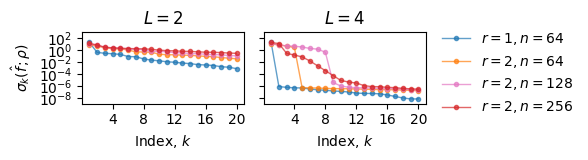

In [26]:
f, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(6,1.7))
for rownum,row in res.iterrows():
  print(rf"{row['r']},{row['n']},{row['L']}",row["Gradient Singular Values"]/np.sqrt(2048))
  ax[rownum//4].semilogy(row["Gradient Singular Values"]/np.sqrt(2048),label=rf"$r={row['r']},n={row['n']}$",linewidth=1,alpha=0.7,marker=".",color=colors[rownum%4])
  ax[rownum//4].set_title(rf"$L = {row['L']}$")
  ax[rownum//4].set_xlabel(rf"Index, $k$")
  ax[rownum//4].set_xticks(list(range(3,20,4)),list(range(4,21,4)))
  ax[rownum//4].set_ylim(10**-9,10**3)
plt.subplot(122)
leg = plt.legend(bbox_to_anchor=(1.025, 1.2))
leg.get_frame().set_edgecolor('b')
leg.get_frame().set_linewidth(0.0)
plt.subplot(121)
plt.ylabel(r"$\sigma_k(\hat f;\rho)$")
plt.yticks([10**p for p in range(-8,3,2)])
# plt.suptitle("Singular Values of Trained Networks")
plt.tight_layout()
plt.savefig("sv.png",dpi=300,bbox_extra_artists=(leg,), bbox_inches='tight')
plt.show()

# Final Table

In [27]:
pivot_table = res.pivot_table(index=("r","n","L")).drop(["lambda","Final Weight Decay"],axis=1)
pivot_table = pivot_table[["Final Train MSE","Generalization MSE","Out of Distribution MSE","Active Subspace Distance"]]

<ipython-input-27-09d687840090>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  pivot_table = res.pivot_table(index=("r","n","L")).drop(["lambda","Final Weight Decay"],axis=1)


In [28]:
pivot_table.to_latex(float_format="%.2e")

<ipython-input-28-8805c3f8c1b7>:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pivot_table.to_latex(float_format="%.2e")


'\\begin{tabular}{lllrrrr}\n\\toprule\n  &     &   &  Final Train MSE &  Generalization MSE &  Out of Distribution MSE &  Active Subspace Distance \\\\\nr & n & L &                  &                     &                          &                           \\\\\n\\midrule\n1 & 64  & 2 &         3.38e-06 &            1.24e-01 &                 1.09e+00 &                  3.95e-02 \\\\\n  &     & 4 &         8.19e-05 &            8.86e-04 &                 5.39e-03 &                  2.48e-03 \\\\\n2 & 64  & 2 &         2.69e-07 &            1.04e+01 &                 4.23e+01 &                  7.59e-01 \\\\\n  &     & 4 &         4.95e-07 &            1.25e+01 &                 5.02e+01 &                  9.57e-01 \\\\\n  & 128 & 2 &         7.78e-05 &            5.97e+00 &                 2.68e+01 &                  4.97e-01 \\\\\n  &     & 4 &         1.74e-05 &            8.04e+00 &                 3.92e+01 &                  5.88e-01 \\\\\n  & 256 & 2 &         4.36e-04 &        

In [29]:
pivot_table

Final Train MSE  Generalization MSE  Out of Distribution MSE  \
r n   L                                                                 
1 64  2     3.383872e-06            0.123922                 1.085970   
      4     8.188788e-05            0.000886                 0.005394   
2 64  2     2.694048e-07           10.363419                42.304131   
      4     4.945031e-07           12.528680                50.188057   
  128 2     7.783952e-05            5.970307                26.774363   
      4     1.742696e-05            8.041153                39.235748   
  256 2     4.355371e-04            4.050545                18.744333   
      4     9.971629e-04            0.023540                 0.238946   

         Active Subspace Distance  
r n   L                            
1 64  2                  0.039473  
      4                  0.002485  
2 64  2                  0.758820  
      4                  0.956562  
  128 2                  0.497017  
      4                  0.588165  
  256 2                  0.272722  
      4                  0.011034

In [30]:
pivot_table.pivot_table(index=("r","n"),values=("Final Train MSE","Generalization MSE","Out of Distribution MSE","Active Subspace Distance"),aggfunc=min)

Active Subspace Distance  Final Train MSE  Generalization MSE  \
r n                                                                    
1 64                   0.002485     3.383872e-06            0.000886   
2 64                   0.758820     2.694048e-07           10.363419   
  128                  0.497017     1.742696e-05            5.970307   
  256                  0.011034     4.355371e-04            0.023540   

       Out of Distribution MSE  
r n                             
1 64                  0.005394  
2 64                 42.304131  
  128                26.774363  
  256                 0.238946

# Training Time Plots

## Train MSE v Epoch

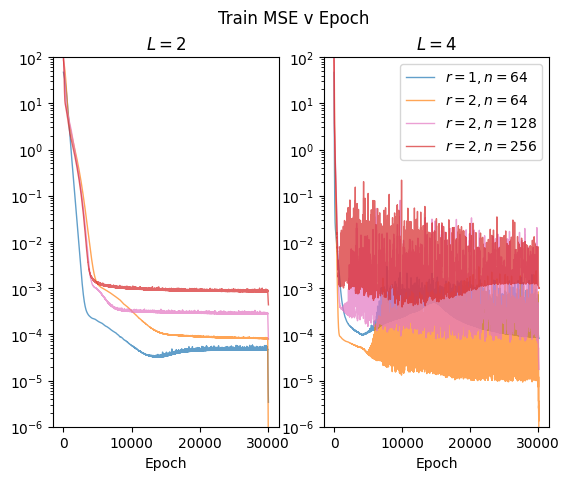

In [31]:
for rownum,row in res.iterrows():
  plt.subplot(1,2,1+rownum//4)
  plt.semilogy(row["Train MSE"],label=rf"$r = {row['r']}, n = {row['n']}$",linewidth=1,alpha=0.7,color=colors[rownum%4])
  plt.title(rf"$L = {row['L']}$")
  plt.xlabel("Epoch")
  plt.ylim(10**-6,10**2)
plt.legend()  
plt.suptitle("Train MSE v Epoch")
plt.savefig("trainmse.png",dpi=300)
plt.show()

## Weight Decay v Epoch

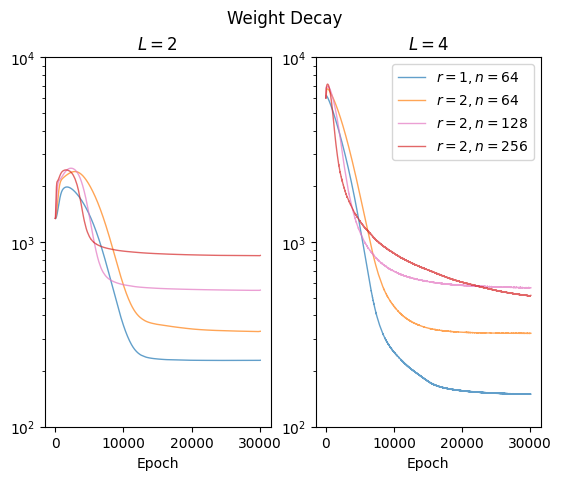

In [32]:
for rownum,row in res.iterrows():
  plt.subplot(1,2,1+rownum//4)
  plt.semilogy(row["Weight Decay"],label=rf"$r = {row['r']}, n = {row['n']}$",linewidth=1,alpha=0.7,color=colors[rownum%4])
  plt.title(rf"$L = {row['L']}$")
  plt.xlabel("Epoch")
  plt.ylim(10**2,10**4)
plt.legend()  
plt.suptitle("Weight Decay")
plt.savefig("weightdecay.png",dpi=300)
plt.show()

## learning rates

30000
100
30000
100
30000
100
30000
100
30000
100
30000
100
30000
100
30000
100


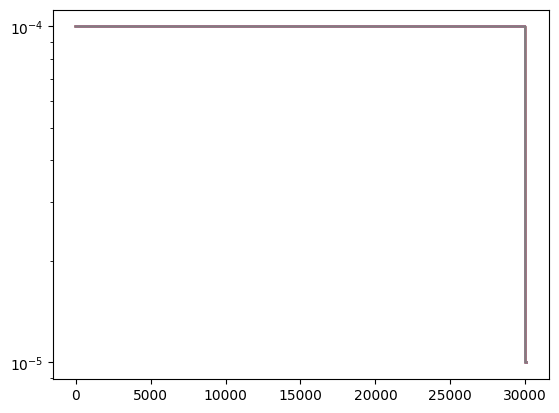

In [33]:
#as expected, 30k epochs at lr = 1e-4, 100 epochs at lr = 1e-5
for rownum,row in res.iterrows():
  plt.semilogy(row["Learning Rate"])
  print(sum(row["Learning Rate"]==1e-4))
  print(sum(row["Learning Rate"]==1e-5))